In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.4.1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
df= fetch_california_housing()

In [7]:
df

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [8]:
X_train_full,X_test,y_train_full,y_test =train_test_split(df.data,df.target,test_size=0.2)

In [9]:
X_train_full

array([[   6.6104    ,   15.        ,    7.34070221, ...,    3.02210663,
          38.5       , -122.71      ],
       [   4.2708    ,   27.        ,    6.28954424, ...,    2.96246649,
          32.83      , -117.18      ],
       [   2.7321    ,   28.        ,    5.04326923, ...,    3.38942308,
          36.85      , -121.79      ],
       ...,
       [   5.5524    ,   21.        ,    6.15664557, ...,    3.11392405,
          38.11      , -122.65      ],
       [   4.8098    ,   29.        ,    5.06748466, ...,    2.55214724,
          33.64      , -117.91      ],
       [   3.75      ,   16.        ,    5.59791667, ...,    3.12916667,
          32.56      , -117.1       ]])

In [10]:
X_train,X_valid,y_train,y_valid =train_test_split(X_train_full,y_train_full,test_size=0.1)

In [11]:
X_train

array([[   5.3559    ,   36.        ,    5.66666667, ...,    3.20657277,
          34.07      , -117.93      ],
       [   3.7566    ,   32.        ,    5.45338983, ...,    5.52754237,
          34.28      , -118.41      ],
       [   1.8438    ,   32.        ,    5.13981763, ...,    4.42857143,
          34.14      , -117.32      ],
       ...,
       [   5.3224    ,   17.        ,    6.10363392, ...,    2.10228802,
          38.        , -121.36      ],
       [   5.3363    ,   16.        ,    4.52912621, ...,    4.4538835 ,
          37.32      , -121.84      ],
       [   2.569     ,   10.        ,    4.70117955, ...,    1.83224115,
          35.4       , -118.91      ]])

Scaling data

In [12]:
scaler=StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)


In [14]:
X_train_scaled

array([[ 0.76957291,  0.58362319,  0.09873485, ...,  0.01677691,
        -0.72512583,  0.80973284],
       [-0.06848813,  0.26647553,  0.00707667, ...,  0.24346134,
        -0.62638906,  0.56980453],
       [-1.07082862,  0.26647553, -0.12768459, ...,  0.13612706,
        -0.69221357,  1.11464175],
       ...,
       [ 0.75201833, -0.92282818,  0.28652655, ..., -0.09107635,
         1.12266237, -0.90475493],
       [ 0.75930217, -1.0021151 , -0.39013625, ...,  0.13859924,
         0.80294329, -1.14468324],
       [-0.6908112 , -1.47783658, -0.31619435, ..., -0.11745129,
        -0.09979293,  0.3198792 ]])

keras sequential model

In [15]:
tf.random.set_seed(1)
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(1)
])

compile the model

In [16]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mse'])

fit the model

In [21]:
model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_valid_scaled,y_valid))

Epoch 1/50
465/465 [==============================] - 1s 2ms/step - loss: 0.2635 - mse: 0.2635 - val_loss: 0.3085 - val_mse: 0.3085
Epoch 2/50
465/465 [==============================] - 1s 2ms/step - loss: 0.2644 - mse: 0.2644 - val_loss: 0.3022 - val_mse: 0.3022
Epoch 3/50
465/465 [==============================] - 1s 2ms/step - loss: 0.2638 - mse: 0.2638 - val_loss: 0.2985 - val_mse: 0.2985
Epoch 4/50
465/465 [==============================] - 1s 1ms/step - loss: 0.2628 - mse: 0.2628 - val_loss: 0.2979 - val_mse: 0.2979
Epoch 5/50
465/465 [==============================] - 1s 1ms/step - loss: 0.2615 - mse: 0.2615 - val_loss: 0.3018 - val_mse: 0.3018
Epoch 6/50
465/465 [==============================] - 1s 1ms/step - loss: 0.2633 - mse: 0.2633 - val_loss: 0.3016 - val_mse: 0.3016
Epoch 7/50
465/465 [==============================] - 1s 2ms/step - loss: 0.2615 - mse: 0.2615 - val_loss: 0.2959 - val_mse: 0.2959
Epoch 8/50
465/465 [==============================] - 1s 1ms/step - loss: 0.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save(filepath='sajid')

INFO:tensorflow:Assets written to: sajid/assets


In [19]:
from tensorflow.keras.utils import plot_model

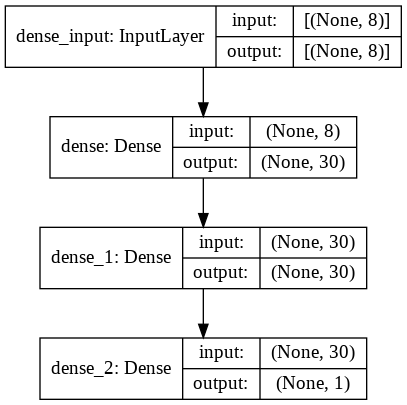

In [23]:
plot_model(model,show_shapes=True)